## 3 qubit bit flip code

Logical0 initial state
Runtime: 11.7 seconds


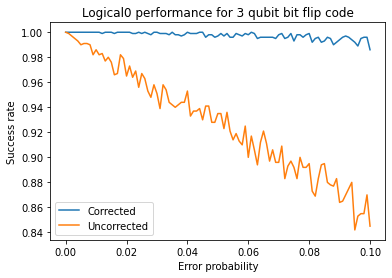


Logical+ initial state
Runtime: 13.2 seconds


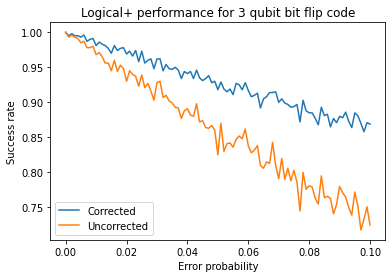

In [6]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit_aer.noise import pauli_error
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Hard-coded constants
random.seed(42)     # For reproducibility
Nshots = 1000

q = QuantumRegister(5)              # Create 5-qubit quantum register
c = ClassicalRegister(2)            # Create 2-bit classical register
cr = ClassicalRegister(3)           # Create 3-bit classical register
simulator = Aer.get_backend('qasm_simulator')   # Choose simulator

error_probs = np.arange(0, 0.101, 0.001)
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Subroutine to loop over pauli_error probabilities
# Argument 'init' chooses between |0> and |+> initial state
def scan_probs(init):
    success_rates = []
    uncorr_rates = []
    fidelities = []   # Add list to store fidelitiesbbb
    for p_err in error_probs:
        bit_flip = QuantumCircuit(q, c)     # Create quantum circuit

        # Prepares qubit in the desired initial state
        # Encodes the qubit in a three-qubit entangled state
        if init == 'plus':
            bit_flip.h(q[0])
        bit_flip.cx(q[0], q[1])
        bit_flip.cx(q[0], q[2])

        # Construct a 1-qubit bit-flip error
        error = pauli_error([('X', 0.5 * p_err),
                             ('Z', 0.5 * p_err),
                             ('I', 1.0 - p_err)])

        # Combine the circuit and the error channel
        for i in range(0,3):
            bit_flip.append(error, [i])

        # Entangle two ancilla qubits for error-correction
        bit_flip.cx(q[0], q[3])
        bit_flip.cx(q[1], q[3])
        bit_flip.cx(q[1], q[4])
        bit_flip.cx(q[2], q[4])

        # Measure the two ancilla qubits
        bit_flip.measure(q[3], c[0])
        bit_flip.measure(q[4], c[1])

        # Do error correction
        bit_flip.x(q[0]).c_if(c,1)
        bit_flip.x(q[1]).c_if(c,3)
        bit_flip.x(q[2]).c_if(c,2)

        if init == 'plus':
            # Decode the qubit from the three-qubit entangled state
            bit_flip.cx(q[0], q[1])
            bit_flip.cx(q[0], q[2])
            bit_flip.h(q[0])

        # Add the classical register to the quantum circuit
        bit_flip.add_register(cr)
        # Check the state of the initial qubit
        for i in range(0,3):
            bit_flip.measure(q[i], cr[i])

        # Reproducibly execute the circuit on the simulator
        seed = random.randrange(0, int(1e6))
        result = execute(bit_flip, simulator, shots=Nshots,
                         seed_simulator=seed).result()

        # Get the counts from the result
        counts = result.get_counts()

        num_success = 0
        raw_success = 0
        counts_dict = dict(counts)
        for key, value in counts_dict.items():
            if key[:3] == '000':
                num_success += value
                if key == '000 00':     # Correct without correction
                    raw_success += value
        success_rates.append(num_success / float(Nshots))
        uncorr_rates.append(raw_success / float(Nshots))
        #print("%.3g %.3g %.3g" % (p_err, success_rates[-1], uncorr_rates[-1]))

    return success_rates, uncorr_rates
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Main code
# Loop over |0> and |+> initial states
for state in ['zero', 'plus']:
    runtime = -time.time()
    if state == 'zero':
        print("Logical0 initial state")
    else:
        # Blank line in output to separate results
        print("\nLogical+ initial state")

    success_rates, uncorr_rates = scan_probs(state)

    # Print runtime here to ignore time spent looking at plot
    runtime += time.time()
    print("Runtime: %0.1f seconds" % runtime)

    if state == 'zero':
      title = 'Logical0 performance for 3 qubit bit flip code'
    else:
      title = 'Logical+ performance for 3 qubit bit flip code'

    # Plot the success rate as a function of the error probability
    # TODO: ADD UNCORRECTED VS CORRECTED...
    plt.plot(error_probs, success_rates, label='Corrected')
    plt.plot(error_probs, uncorr_rates, label='Uncorrected')
    plt.title(title)
    plt.xlabel('Error probability')
    plt.ylabel('Success rate')
    plt.legend(loc='lower left')
    plt.show()
# ---------------

## 3 qubit Phase flip code

Logical0 initial state
Runtime: 14.0 seconds


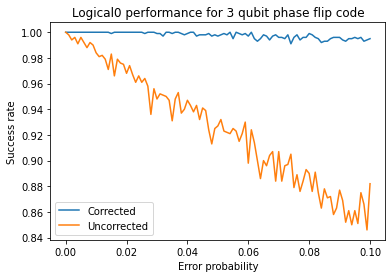


Logical+ initial state
Runtime: 15.2 seconds


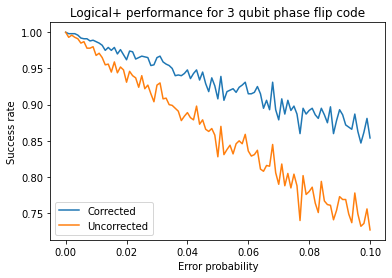

In [8]:
# Hard-coded constants
random.seed(42)     # For reproducibility
Nshots = 1000

q = QuantumRegister(5)              # Create 5-qubit quantum register
c = ClassicalRegister(2)            # Create 2-bit classical register
cr = ClassicalRegister(3)           # Create 3-bit classical register
simulator = Aer.get_backend('qasm_simulator')   # Choose simulator

error_probs = np.arange(0, 0.101, 0.001)
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Subroutine to loop over pauli_error probabilities
# Argument 'init' chooses between |0> and |+> initial state
def scan_probs(init):
    success_rates = []
    uncorr_rates = []
    for p_err in error_probs:
        phase_flip = QuantumCircuit(q, c)     # Create quantum circuit

        # Prepares qubit in the desired initial state
        # Encodes the qubit in a three-qubit entangled state
        if init == 'plus':
            phase_flip.h(q[0])
        phase_flip.cx(q[0], q[1])
        phase_flip.cx(q[0], q[2])
        for i in range(0,3):
            phase_flip.h(q[i])
        # Construct a 1-qubit bit-flip error
        error = pauli_error([('X', 0.5 * p_err),
                             ('Z', 0.5 * p_err),
                             ('I', 1.0 - p_err)])

        # Combine the circuit and the error channel
        for i in range(0,3):
            phase_flip.append(error, [i])
        for i in range(0,3):
            phase_flip.h(q[i])
        # Entangle two ancilla qubits for error-correction
        phase_flip.cx(q[0], q[3])
        phase_flip.cx(q[1], q[3])
        phase_flip.cx(q[1], q[4])
        phase_flip.cx(q[2], q[4])

        # Measure the two ancilla qubits
        phase_flip.measure(q[3], c[0])
        phase_flip.measure(q[4], c[1])

        # Do error correction
        phase_flip.x(q[0]).c_if(c,1)
        phase_flip.x(q[1]).c_if(c,3)
        phase_flip.x(q[2]).c_if(c,2)

        if init == 'plus':
            # Decode the qubit from the three-qubit entangled state
            phase_flip.cx(q[0], q[1])
            phase_flip.cx(q[0], q[2])
            phase_flip.h(q[0])

        # Add the classical register to the quantum circuit
        phase_flip.add_register(cr)
        # Check the state of the initial qubit
        for i in range(0,3):
            phase_flip.measure(q[i], cr[i])

        # Reproducibly execute the circuit on the simulator
        seed = random.randrange(0, int(1e6))
        result = execute(phase_flip, simulator, shots=Nshots,
                         seed_simulator=seed).result()

        # Get the counts from the result
        counts = result.get_counts()

        num_success = 0
        raw_success = 0
        counts_dict = dict(counts)
        for key, value in counts_dict.items():
            if key[:3] == '000':
                num_success += value
                if key == '000 00':     # Correct without correction
                    raw_success += value
        success_rates.append(num_success / float(Nshots))
        uncorr_rates.append(raw_success / float(Nshots))
        #print("%.3g %.3g %.3g" % (p_err, success_rates[-1], uncorr_rates[-1]))

    return success_rates, uncorr_rates
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Main code
# Loop over |0> and |+> initial states
for state in ['zero', 'plus']:
    runtime = -time.time()
    if state == 'zero':
        print("Logical0 initial state")
    else:
        # Blank line in output to separate results
        print("\nLogical+ initial state")

    success_rates, uncorr_rates = scan_probs(state)

    # Print runtime here to ignore time spent looking at plot
    runtime += time.time()
    print("Runtime: %0.1f seconds" % runtime)

    if state == 'zero':
      title = 'Logical0 performance for 3 qubit phase flip code'
    else:
      title = 'Logical+ performance for 3 qubit phase flip code'

    # Plot the success rate as a function of the error probability
    # TODO: ADD UNCORRECTED VS CORRECTED...
    plt.plot(error_probs, success_rates, label='Corrected')
    plt.plot(error_probs, uncorr_rates, label='Uncorrected')
    plt.title(title)
    plt.xlabel('Error probability')
    plt.ylabel('Success rate')
    plt.legend(loc='lower left')
    plt.show()

This code simulates a quantum error correction circuit to correct bit flip errors. It performs error correction at increasing error probabilities, starting from 0% and increasing by 5% at each iteration up to 100%.

For each error probability, the code performs 1000 rounds of error correction. In each round, it sets up a quantum circuit with 3 qubits and applies a random bit flip error to the qubits with the given probability. It then entangles the qubits with 2 ancilla qubits, measures the ancilla qubits, and applies correction gates to the original qubits based on the measurement results. Finally, it measures the original qubits and checks if the error was corrected successfully.

The code then calculates the success rate as the number of successful error corrections divided by the total number of rounds, and plots the success rate as a function of the error probability.

## The SHOR Code

Logical0 initial state
Runtime: 47.6 seconds


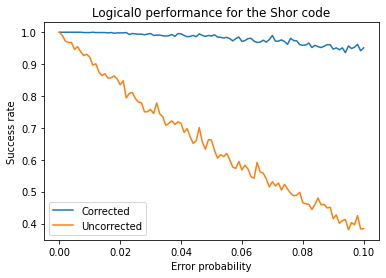


Logical+ initial state
Runtime: 52.6 seconds


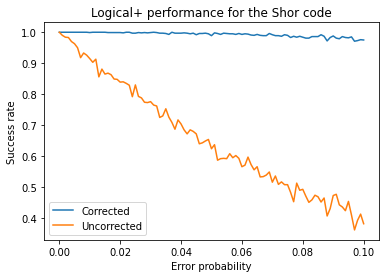

In [10]:

# Hard-coded constants
random.seed(42)     # For reproducibility
Nshots = 1000

q = QuantumRegister(17)             # Create 17-qubit quantum register
c = ClassicalRegister(2)            # Create 2-bit classical register
c1 = ClassicalRegister(2)           # Create 2-bit classical register
c2 = ClassicalRegister(2)           # Create 2-bit classical register
c3 = ClassicalRegister(2) 
c4 = ClassicalRegister(9)           # Create 9-bit classical register to measure data qubits
simulator = Aer.get_backend('qasm_simulator')   # Choose simulator

error_probs = np.arange(0, 0.101, 0.001)
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Subroutine to loop over pauli_error probabilities
# Argument 'init' chooses between |0> and |+> initial state
def scan_probs(init):
    success_rates = []
    uncorr_rates = []
    for p_err in error_probs:
        shor = QuantumCircuit(q, c)     # Create quantum circuit

        # Prepares qubit in the desired initial state
        # Encodes the qubit in a nine-qubit entangled state
        if init == 'plus':
            shor.h(q[0])
        shor.cx(q[0], q[3])
        shor.cx(q[0], q[6])
        shor.h(q[0])
        shor.h(q[3])
        shor.h(q[6])
        for i in range(1,3):
            shor.cx(0,i)
        for j in range(4,6):
            shor.cx(3,j)
        for k in range(7,9):
            shor.cx(6,k)
        # Construct a 1-qubit bit-flip or phase-flip error
        error = pauli_error([('X', 0.5 * p_err),
                             ('Z', 0.5 * p_err),
                             ('I', 1.0 - p_err)])

        # Combine the circuit and the error channel
        for i in range(0,9):
            shor.append(error, [i])
       #Entangle with bit flip ancilla qubits
        #First block
        shor.cx(q[0],q[9])
        shor.cx(q[1],q[9])
        shor.cx(q[1],q[10])
        shor.cx(q[2],q[10])
        # Measure the two additional qubits
        shor.measure(q[9], c[0])
        shor.measure(q[10], c[1])

        # Do error correction
        shor.x(q[0]).c_if(c,1)
        shor.x(q[1]).c_if(c,3)
        shor.x(q[2]).c_if(c,2)

        # Add the classical register to the quantum circuit
        shor.add_register(c1)
        #Second block
        shor.cx(q[3],q[11])
        shor.cx(q[4],q[11])
        shor.cx(q[4],q[12])
        shor.cx(q[5],q[12])
        # Measure the two additional qubits
        shor.measure(q[11], c1[0])
        shor.measure(q[12], c1[1])

        # Do error correction
        shor.x(q[3]).c_if(c1,1)
        shor.x(q[4]).c_if(c1,3)
        shor.x(q[5]).c_if(c1,2)


        # Add the classical register to the quantum circuit
        shor.add_register(c2)
        #Third block
        shor.cx(q[6],q[13])
        shor.cx(q[7],q[13])
        shor.cx(q[7],q[14])
        shor.cx(q[8],q[14])

        # Measure the two additional qubits
        shor.measure(q[13], c2[0])
        shor.measure(q[14], c2[1])

        # Do error correction
        shor.x(q[6]).c_if(c2,1)
        shor.x(q[7]).c_if(c2,3)
        shor.x(q[8]).c_if(c2,2)
        # Add the classical register to the quantum circuit
        shor.add_register(c3)
        #phase flip syndrome measurements
        for i in range(9):
            shor.h(q[i])
        #Entangle with ancillas
        for i in range(6):
            shor.cx(q[i],q[15])
        for i in range(3,9):
            shor.cx(q[i],q[16])

        # Measure the two additional qubits
        shor.measure(q[15], c3[0])
        shor.measure(q[16], c3[1])

        #Back into x basis
        for i in range(9):
            shor.h(q[i])
        # Do error correction
        shor.z(q[0]).c_if(c3,1)
        shor.z(q[3]).c_if(c3,3)
        shor.z(q[6]).c_if(c3,2)
        #Decode
        for i in range(1,3):
            shor.cx(q[0],q[i])
        for j in range(4,6):
            shor.cx(q[3],q[j])
        for k in range(7,9):
            shor.cx(q[6],q[k])
        shor.h(q[0])
        shor.h(q[3])
        shor.h(q[6])
        shor.cx(q[0],q[3])
        shor.cx(q[0],q[6])
        if init == 'plus':
            shor.h(q[0])

        #Now measure the code qubits to see if the error was corrected successfully
        shor.add_register(c4)
        for i in range(9):
            shor.measure(q[i],c4[i])

        # Reproducibly execute the circuit on the simulator
        seed = random.randrange(0, int(1e6))
        result = execute(shor, simulator, shots=Nshots,
                         seed_simulator=seed).result()

        # Get the counts from the result
        counts = result.get_counts()

        num_success = 0
        raw_success = 0
        counts_dict = dict(counts)
        for key, value in counts_dict.items():
            if key[:9] == '000000000':
                num_success += value
                if key == '000000000 00 00 00 00':     # Correct without correction
                    raw_success += value
        success_rates.append(num_success / float(Nshots))
        uncorr_rates.append(raw_success / float(Nshots))
        #print("%.3g %.3g %.3g" % (p_err, success_rates[-1], uncorr_rates[-1]))

    return success_rates, uncorr_rates
# ------------------------------------------------------------------



# ------------------------------------------------------------------
# Main code
# Loop over |0> and |+> initial states
for state in ['zero', 'plus']:
    runtime = -time.time()
    if state == 'zero':
        print("Logical0 initial state")
    else:
        # Blank line in output to separate results
        print("\nLogical+ initial state")

    success_rates, uncorr_rates = scan_probs(state)

    # Print runtime here to ignore time spent looking at plot
    runtime += time.time()
    print("Runtime: %0.1f seconds" % runtime)

    if state == 'zero':
      title = 'Logical0 performance for the Shor code'
    else:
      title = 'Logical+ performance for the Shor code'

    # Plot the success rate as a function of the error probability
    # TODO: ADD UNCORRECTED VS CORRECTED...
    plt.plot(error_probs, success_rates, label='Corrected')
    plt.plot(error_probs, uncorr_rates, label='Uncorrected')
    plt.title(title)
    plt.xlabel('Error probability')
    plt.ylabel('Success rate')
    plt.legend(loc='lower left')
    plt.show()

# c_if

{'000000001 00 00 00 00': 1000}


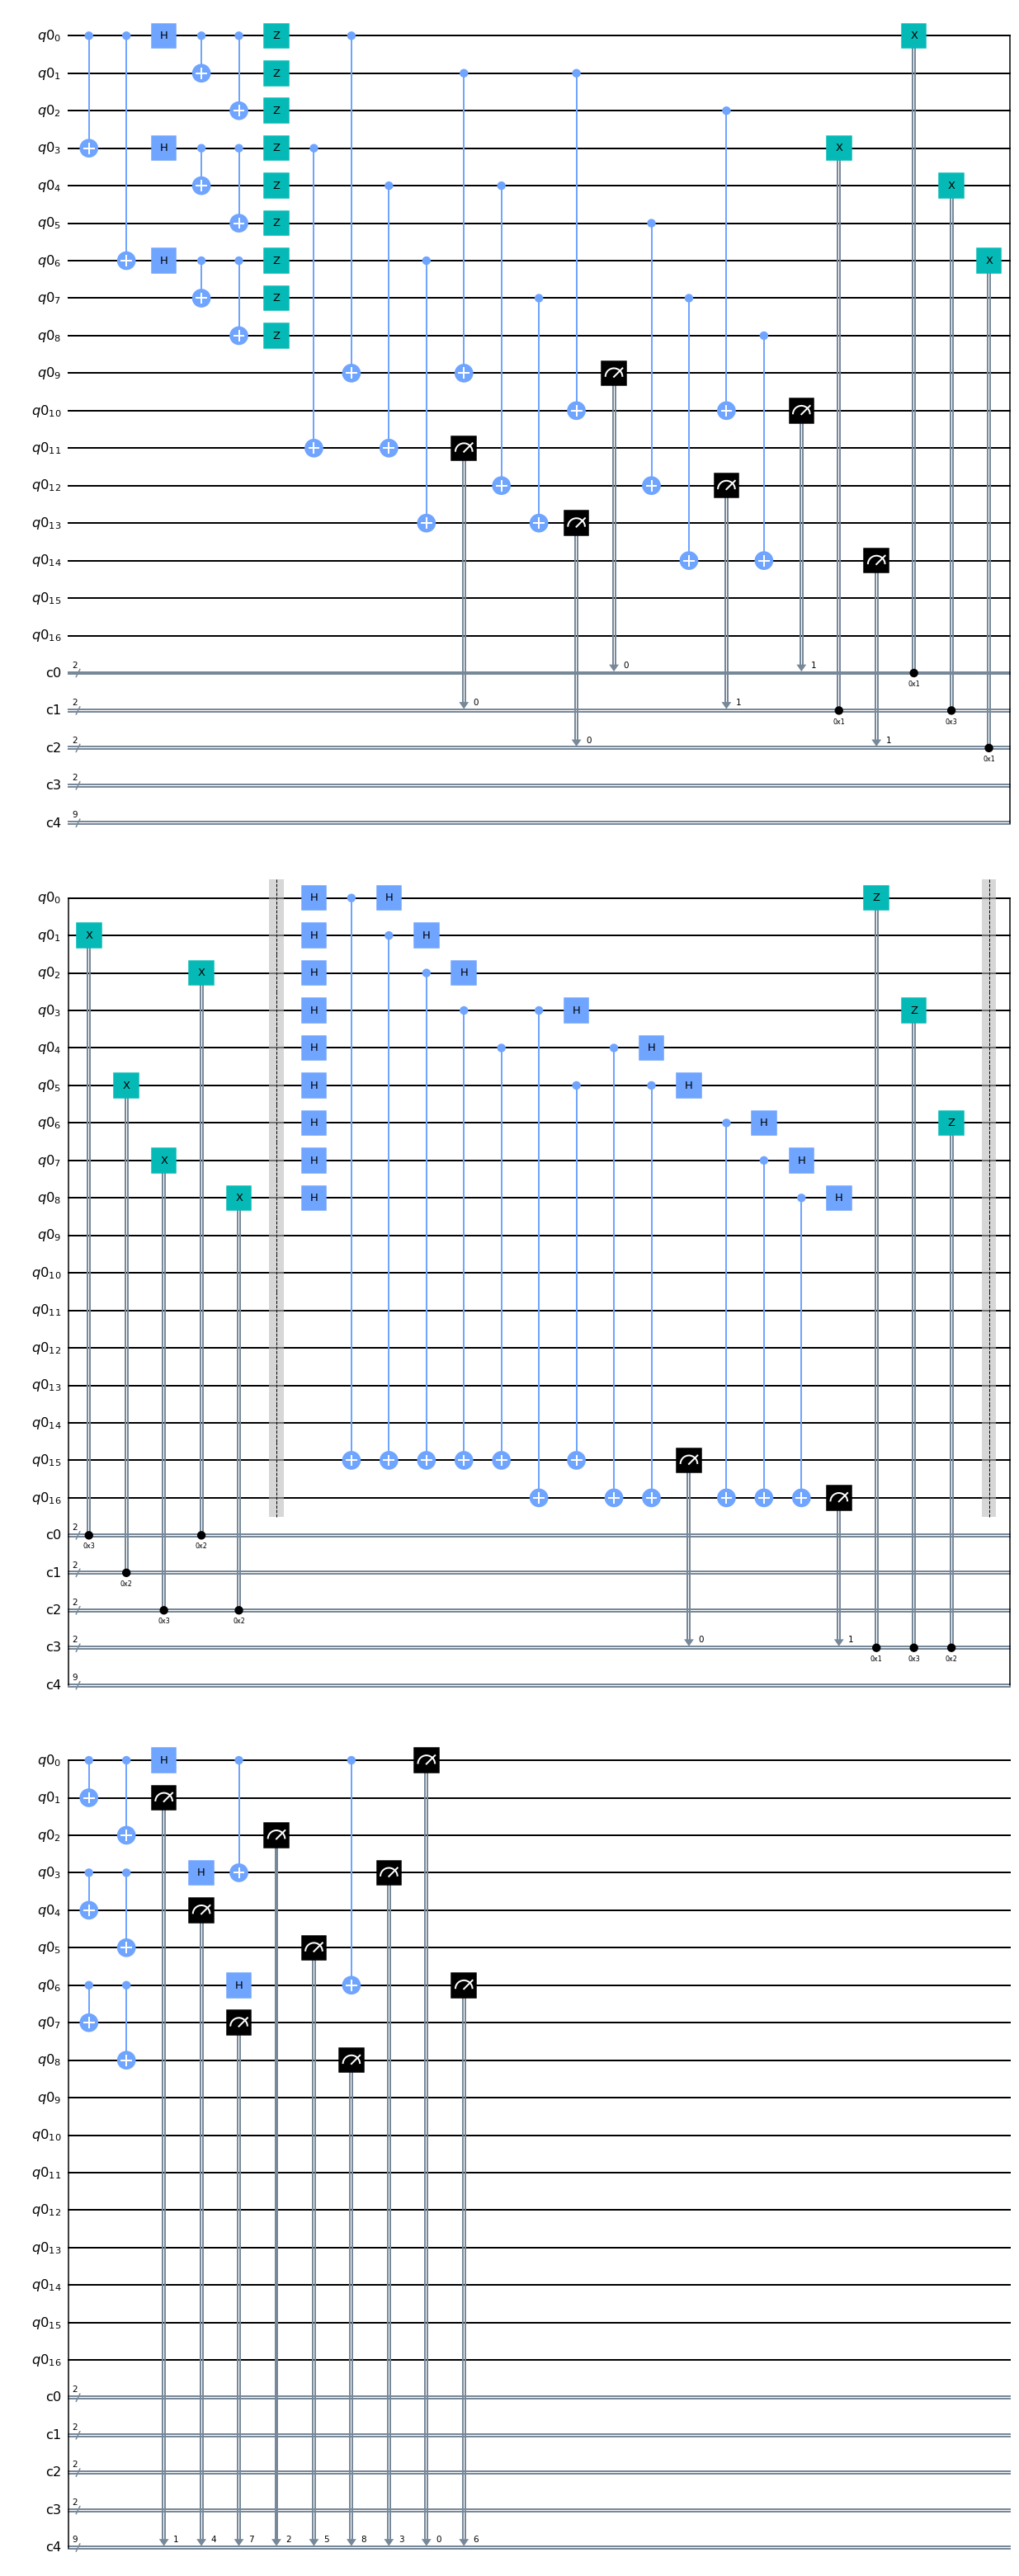

In [1]:
from qiskit import *
from qiskit_aer.noise import pauli_error
# Create a quantum register with 9 code qubits and 8 ancilla qubits
q = QuantumRegister(17)

# Create a classical register with 6 bits
c = ClassicalRegister(2)

# Create a quantum circuit
shor = QuantumCircuit(q, c)

# Encodes the qubit in a nine-qubit entangled state  
shor.cx(q[0], q[3])
shor.cx(q[0], q[6])
shor.h(q[0])
shor.h(q[3])
shor.h(q[6])

for i in range(1,3):
    shor.cx(0,i)
for j in range(4,6):
    shor.cx(3,j)
for k in range(7,9):
    shor.cx(6,k)

# Construct a 1-qubit error-flip error
# p_error = 0.3
# error = pauli_error([('X', p_error/2), ('Z', p_error/2),('I', 1 - p_error)])


# # Combine the circuit and the error channel
# for i in range(0,9):
#     shor.append(error, [i])
for i in range(9):
    shor.z(i)
#Entangle with bit flip ancilla qubits
#First block
shor.cx(q[0],q[9])
shor.cx(q[1],q[9])
shor.cx(q[1],q[10])
shor.cx(q[2],q[10])
# Measure the two additional qubits
shor.measure(q[9], c[0])
shor.measure(q[10], c[1])

# Do error correction
shor.x(q[0]).c_if(c,1)
shor.x(q[1]).c_if(c,3)
shor.x(q[2]).c_if(c,2)

#Add another 2 classical bits for the next block
# Create a classical register with 2 bits
c1 = ClassicalRegister(2)

# Add the classical register to the quantum circuit
shor.add_register(c1)
#Second block
shor.cx(q[3],q[11])
shor.cx(q[4],q[11])
shor.cx(q[4],q[12])
shor.cx(q[5],q[12])
# Measure the two additional qubits
shor.measure(q[11], c1[0])
shor.measure(q[12], c1[1])

# Do error correction
shor.x(q[3]).c_if(c1,1)
shor.x(q[4]).c_if(c1,3)
shor.x(q[5]).c_if(c1,2)

# Add another creg
c2 = ClassicalRegister(2)
# Add the classical register to the quantum circuit
shor.add_register(c2)
#Third block
shor.cx(q[6],q[13])
shor.cx(q[7],q[13])
shor.cx(q[7],q[14])
shor.cx(q[8],q[14])

# Measure the two additional qubits
shor.measure(q[13], c2[0])
shor.measure(q[14], c2[1])

# Do error correction
shor.x(q[6]).c_if(c2,1)
shor.x(q[7]).c_if(c2,3)
shor.x(q[8]).c_if(c2,2)

shor.barrier()
# Add another creg
c3 = ClassicalRegister(2)
# Add the classical register to the quantum circuit
shor.add_register(c3)
#phase flip syndrome measurements
for i in range(9):
    shor.h(q[i])
#Entangle with ancillas
for i in range(6):
    shor.cx(q[i],q[15])
for i in range(3,9):
    shor.cx(q[i],q[16])

# Measure the two additional qubits
shor.measure(q[15], c3[0])
shor.measure(q[16], c3[1])

#Back into x basis
for i in range(9):
    shor.h(q[i])
# Do error correction
shor.z(q[0]).c_if(c3,1)
shor.z(q[3]).c_if(c3,3)
shor.z(q[6]).c_if(c3,2)

shor.barrier()
#Decode
for i in range(1,3):
    shor.cx(q[0],q[i])
for j in range(4,6):
    shor.cx(q[3],q[j])
for k in range(7,9):
    shor.cx(q[6],q[k])
shor.h(q[0])
shor.h(q[3])
shor.h(q[6])
shor.cx(q[0],q[3])
shor.cx(q[0],q[6])

#Now measure the code qubits to see if the error was corrected successfully
# Add another creg
c4 = ClassicalRegister(9)
# Add the classical register to the quantum circuit
shor.add_register(c4)
for i in range(9):
    shor.measure(q[i],c4[i])

# Choose a simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the simulator
result = execute(shor, simulator, shots = 1000).result()

# Get the counts from the result
counts = result.get_counts()
print(counts)
shor.draw('mpl')

# Logical H gate

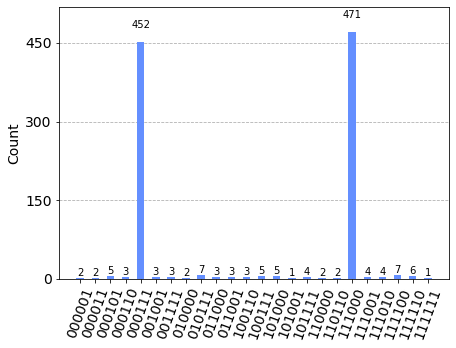

In [3]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import *
from qiskit.visualization import plot_histogram
import qiskit_aer.noise as noise
from math import*

#Create a logical Hadamard gate
logicalh = QuantumCircuit(6)
logicalh.rz(pi/2,0)
logicalh.ry(pi/2,0)
for i in range (1,6):
    logicalh.cx(0,i)
for i in range(3,6):
    logicalh.x(i)
logH = logicalh.to_gate()

#Encode 2 logical 0s
bit_flip = QuantumCircuit(6,6)
bit_flip.cx(0,1)
bit_flip.cx(0,2)
bit_flip.cx(3,4)
bit_flip.cx(3,5)

#Create logical (|01> +|10>) bell state
bit_flip.append(logH,[0,1,2,3,4,5])

#introduce noise model 
# Error probabilities
prob_1 = 0.01 # 1-qubit gate
prob_2 = 0.01   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)
# error_3 = QuantumError(gate_error_3)


# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1','u2','u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
# Get basis gates from noise model
basis_gates = noise_model.basis_gates
for i in range(0,6):
    bit_flip.measure(i,i)
# Perform a noise simulation
result = execute(bit_flip, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots = 1000).result()
counts = result.get_counts(0)
plot_histogram(counts) 

Add in 4 ancillas, measure them to check for errors, correct errors, decode and find if we are correct.

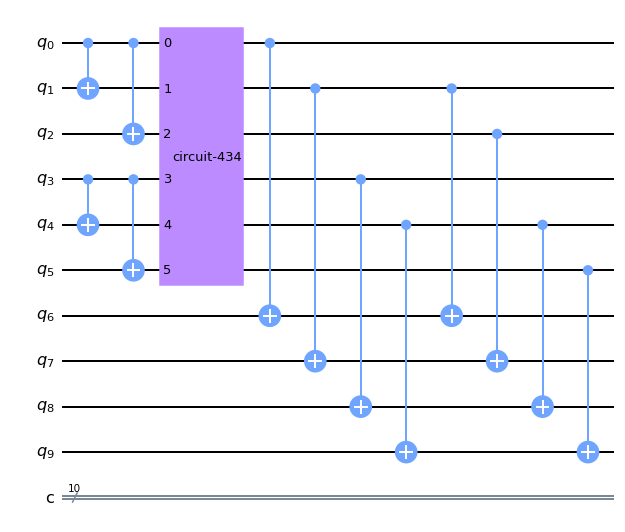

In [4]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import *
from qiskit.visualization import plot_histogram
import qiskit_aer.noise as noise
from math import*

#Create a logical Hadamard gate
logicalh = QuantumCircuit(6)
logicalh.rz(pi/2,0)
logicalh.ry(pi/2,0)
for i in range (1,6):
    logicalh.cx(0,i)
for i in range(3,6):
    logicalh.x(i)
logH = logicalh.to_gate()
logH_inv = logH.inverse()
#Encode 2 logical 0s
bit_flip = QuantumCircuit(10,10)
bit_flip.cx(0,1)
bit_flip.cx(0,2)
bit_flip.cx(3,4)
bit_flip.cx(3,5)

#Create logical (|01> +|10>) bell state
bit_flip.append(logH,[0,1,2,3,4,5])
#Entangle with ancilla qubits
for i in range(0,2):
    bit_flip.cx(i,6)
    bit_flip.cx(i+1,7)
    bit_flip.cx(i+3,8)
    bit_flip.cx(i+4,9)
bit_flip.draw('mpl')

{'0000000000': 1}


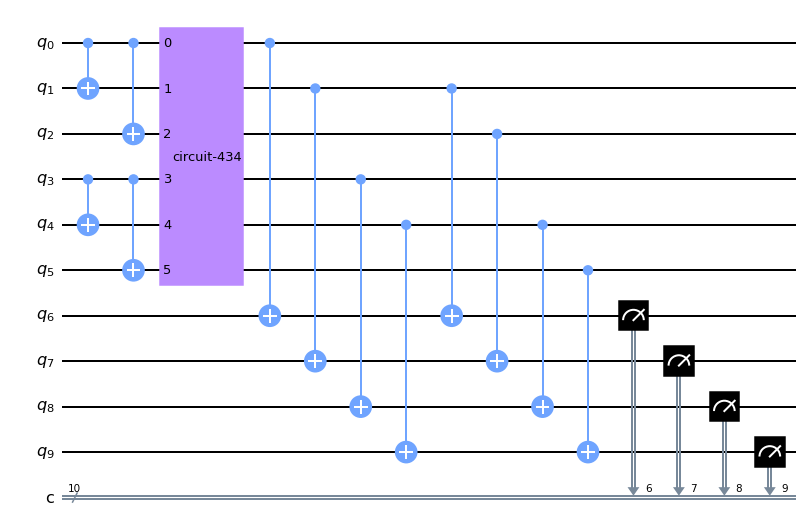

In [5]:
#introduce noise model 
# Error probabilities
prob_1 = 0 # 1-qubit gate
prob_2 = 0   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)
# error_3 = QuantumError(gate_error_3)


# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1','u2','u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
# Get basis gates from noise model
basis_gates = noise_model.basis_gates

#Measure ancilla qubits
for i in range(6,10):
    bit_flip.measure(i,i)
# Perform a noise simulation
result = execute(bit_flip, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots = 1).result()
counts = result.get_counts(0)
#Slice the dict to get ancilla results
for key, value in counts.items():
            if key[0:2] == '01':
                bit_flip.x(3)
            if key[0:2] == '11':
                bit_flip.x(4)
            if key[0:2] == '10':
                bit_flip.x(5)
            if key[2:4] == '01':
                bit_flip.x(0)
            if key[2:4] == '11':
                bit_flip.x(1)
            if key[2:4] == '10':
                bit_flip.x(2)
print(counts)
bit_flip.draw('mpl')


In [11]:
q = QuantumRegister(17)

# Create a classical register with 6 bits
c = ClassicalRegister(2)

# Create a quantum circuit
shor = QuantumCircuit(q, c)

# Encodes the qubit in a nine-qubit entangled state  
shor.h(q[0])
shor.cx(q[0], q[3])
shor.cx(q[0], q[6])
shor.h(q[0])
shor.h(q[3])
shor.h(q[6])

for i in range(1,3):
    shor.cx(0,i)
for j in range(4,6):
    shor.cx(3,j)
for k in range(7,9):
    shor.cx(6,k)

# Construct a 1-qubit error-flip error
p_error = error_probability
error = pauli_error([('X', p_error/2), ('Z', p_error/2),('I', 1 - p_error)])


# Combine the circuit and the error channel
for i in range(0,9):
    shor.append(error, [i])

#Entangle with bit flip ancilla qubits
#First block
shor.cx(q[0],q[9])
shor.cx(q[1],q[9])
shor.cx(q[1],q[10])
shor.cx(q[2],q[10])
# Measure the two additional qubits
shor.measure(q[9], c[0])
shor.measure(q[10], c[1])

# Do error correction
shor.x(q[0]).c_if(c,1)
shor.x(q[1]).c_if(c,3)
shor.x(q[2]).c_if(c,2)

#Add another 2 classical bits for the next block
# Create a classical register with 2 bits
c1 = ClassicalRegister(2)

# Add the classical register to the quantum circuit
shor.add_register(c1)
#Second block
shor.cx(q[3],q[11])
shor.cx(q[4],q[11])
shor.cx(q[4],q[12])
shor.cx(q[5],q[12])
# Measure the two additional qubits
shor.measure(q[11], c1[0])
shor.measure(q[12], c1[1])

# Do error correction
shor.x(q[3]).c_if(c1,1)
shor.x(q[4]).c_if(c1,3)
shor.x(q[5]).c_if(c1,2)

# Add another creg
c2 = ClassicalRegister(2)
# Add the classical register to the quantum circuit
shor.add_register(c2)
#Third block
shor.cx(q[6],q[13])
shor.cx(q[7],q[13])
shor.cx(q[7],q[14])
shor.cx(q[8],q[14])

# Measure the two additional qubits
shor.measure(q[13], c2[0])
shor.measure(q[14], c2[1])

# Do error correction
shor.x(q[6]).c_if(c2,1)
shor.x(q[7]).c_if(c2,3)
shor.x(q[8]).c_if(c2,2)

shor.barrier()
# Add another creg
c3 = ClassicalRegister(2)
# Add the classical register to the quantum circuit
shor.add_register(c3)
#phase flip syndrome measurements
for i in range(9):
    shor.h(q[i])
#Entangle with ancillas
for i in range(6):
    shor.cx(q[i],q[15])
for i in range(3,9):
    shor.cx(q[i],q[16])

# Measure the two additional qubits
shor.measure(q[15], c3[0])
shor.measure(q[16], c3[1])

#Back into x basis
for i in range(9):
    shor.h(q[i])
# Do error correction
shor.z(q[0]).c_if(c3,1)
shor.z(q[3]).c_if(c3,3)
shor.z(q[6]).c_if(c3,2)

shor.barrier()
#Decode
for i in range(1,3):
    shor.cx(q[0],q[i])
for j in range(4,6):
    shor.cx(q[3],q[j])
for k in range(7,9):
    shor.cx(q[6],q[k])
shor.h(q[0])
shor.h(q[3])
shor.h(q[6])
shor.cx(q[0],q[3])
shor.cx(q[0],q[6])
shor.h(q[0])
#Now measure the code qubits to see if the error was corrected successfully
# Add another creg
c4 = ClassicalRegister(9)
# Add the classical register to the quantum circuit
shor.add_register(c4)
for i in range(9):
    shor.measure(q[i],c4[i])

# Choose a simulator
tcirc = transpile(shor, sim_auckland)

# Execute noisy simulation and get counts
result_noise = sim_auckland.run(tcirc,shots = 1000).result()
counts = result_noise.get_counts(0)

counts_dict = dict(counts)
success = 0
no_correction_success = 0
counts_dict = dict(counts)
for key, value in counts_dict.items():
    if key[:9] == '000000000':
        success += value
    if key == '000000000 00000000':
        no_correction_success += value
        
errors_corrected = (success - no_correction_success)
errors_uncorrected = (1000-success)

print(f'There were {success} successes. Out of those, there were {errors_corrected} errors corrected.')
print(f'In total, there were {errors_uncorrected} uncorrected errors.')
print(f'Therefore, when an error occured, it was corrected {round((errors_corrected/errors_uncorrected)*100, 2)}% of the time')
print(f'Overall, the success rate was {success/10}%.')
plot_histogram(counts)


NameError: name 'error_probability' is not defined

In [2]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeAuckland
from qiskit.visualization import plot_histogram
device_backend = FakeAuckland()
sim_auckland = AerSimulator.from_backend(device_backend)

q = QuantumRegister(5)

# Create a classical register with 5 bits
c = ClassicalRegister(2)

# Create a quantum circuit
bit_flip = QuantumCircuit(q, c)

# Prepares qubit in the desired initial state 

# Encodes the qubit in a three-qubit entangled state  
bit_flip.cx(q[0], q[1])
bit_flip.cx(q[0], q[2])

# Adds additional two qubits for error-correction
bit_flip.cx(q[0], q[3])
bit_flip.cx(q[1], q[3])
bit_flip.cx(q[1], q[4])
bit_flip.cx(q[2], q[4])

# Measure the two additional qubits
bit_flip.measure(q[3], c[0])
bit_flip.measure(q[4], c[1])

# Do error correction
bit_flip.x(q[0]).c_if(c,1)
bit_flip.x(q[1]).c_if(c,3)
bit_flip.x(q[2]).c_if(c,2)

# Decodes the qubit from the three-qubit entangled state  
# bit_flip.cx(q[0], q[1])
# bit_flip.cx(q[0], q[2])

# Create a classical register with 3 bits
cr = ClassicalRegister(3)
            
# Add the classical register to the quantum circuit
bit_flip.add_register(cr)
# Check the state of the initial qubit
for i in range(0,3):
    bit_flip.measure(q[i], cr[i])
# Choose a simulator
tcirc = transpile(bit_flip, sim_auckland)

# Execute noisy simulation and get counts
result_noise = sim_auckland.run(tcirc, shots = 1000).result()
counts = result_noise.get_counts(0)

counts_dict = dict(counts)
success = 0
no_correction_success = 0
for key, value in counts_dict.items():
    if key[:3] == '000':
        success += value
    if key == '000 00':
        no_correction_success += value
        
errors_corrected = (success - no_correction_success)
errors_uncorrected = (1000-success)

print(f'There were {success} successes. Out of those, there were {errors_corrected} errors corrected.')
print(f'In total, there were {errors_uncorrected} uncorrected errors.')
print(f'Therefore, when an error occured, it was corrected {round((errors_corrected/errors_uncorrected)*100, 2)}% of the time')
print(f'Overall, the success rate was {success/10}%.')
plot_histogram(counts)

NameError: name 'QuantumRegister' is not defined

In [1]:
q = QuantumRegister(5)

# Create a classical register with 5 bits
c = ClassicalRegister(2)

# Create a quantum circuit
bit_flip = QuantumCircuit(q, c)

# Prepares qubit in the desired initial state 

# Encodes the qubit in a three-qubit entangled state  
bit_flip.h(q[0])
bit_flip.cx(q[0], q[1])
bit_flip.cx(q[0], q[2])

# Adds additional two qubits for error-correction
bit_flip.cx(q[0], q[3])
bit_flip.cx(q[1], q[3])
bit_flip.cx(q[1], q[4])
bit_flip.cx(q[2], q[4])

# Measure the two additional qubits
bit_flip.measure(q[3], c[0])
bit_flip.measure(q[4], c[1])

# Do error correction
bit_flip.x(q[0]).c_if(c,1)
bit_flip.x(q[1]).c_if(c,3)
bit_flip.x(q[2]).c_if(c,2)

# Decodes the qubit from the three-qubit entangled state  
bit_flip.cx(q[0], q[1])
bit_flip.cx(q[0], q[2])
bit_flip.h(q[0])

# Create a classical register with 3 bits
cr = ClassicalRegister(3)
            
# Add the classical register to the quantum circuit
bit_flip.add_register(cr)
# Check the state of the initial qubit
for i in range(0,3):
    bit_flip.measure(q[i], cr[i])
# Choose a simulator
tcirc = transpile(bit_flip, sim_auckland)

# Execute noisy simulation and get counts
result_noise = sim_auckland.run(tcirc,shots = 1000).result()
counts = result_noise.get_counts(0)

counts_dict = dict(counts)
success = 0
no_correction_success = 0
for key, value in counts_dict.items():
    if key[:3] == '000':
        success += value
    if key == '000 00':
        no_correction_success += value
        
errors_corrected = (success - no_correction_success)
errors_uncorrected = (1000-success)

print(f'There were {success} successes. Out of those, there were {errors_corrected} errors corrected.')
print(f'In total, there were {errors_uncorrected} uncorrected errors.')
print(f'Therefore, when an error occured, it was corrected {round((errors_corrected/errors_uncorrected)*100, 2)}% of the time')
print(f'Overall, the success rate was {success/10}%.')
plot_histogram(counts)

NameError: name 'QuantumRegister' is not defined